In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sympy as sy
sy.init_printing() 

In [3]:
np.set_printoptions(precision=3) #控制输出的小数点个数是3
np.set_printoptions(suppress=True) #表示小数不需要以科学计数法的形式输出

# <font face="gotham" color="purple"> 特征值和特征向量

对$n \times n$的矩阵A存在一个非零的向量$x$使得$Ax = \lambda x$ ，其中$x$是矩阵$A$的特征向量，$\lambda$是标量，被称为是$A$的特征值，它与特征向量$x$有对应关系。

改写式子
$$
(A-\lambda I)x = 0
$$

因为特征向量是非零的向量，因此：

1. $(A-\lambda I)$的行与行、列于列之间是线性相关的。
2. $(A-\lambda I)$ 非满秩, $Rank(A-\lambda I)<n$.
3. $(A-\lambda I)$ 不可逆
4. 特征方程$\text{det}(A-\lambda I)=0$

对于$A$

$$
A=\left[\matrix{1 & 0 & 0\cr 1 & 0 & 1\cr 2 & -2 & 3}\right]
$$

建立特征方程

$$
\text{det}\left(
\left[\matrix{1 & 0 & 0\cr 1 & 0 & 1\cr 2 & -2 & 3}\right]-
\lambda
\left[\matrix{1 & 0 & 0\cr 0 & 1 & 0\cr 0 & 0 & 1}\right]
\right)=0
$$

使用SymPy中的函数 ```charpoly``` 和 ```factor```,计算特征值

In [4]:
lamda = sy.symbols('lamda') # 定义lamda符号

```charpoly``` 函数返回特征方程

In [9]:
A = sy.Matrix([[1, 0, 0], [1, 0, 1], [2, -2, 3]])
p = A.charpoly(lamda); p #建立特征方程

In [18]:
p.as_expr() #提取出表达式

因式分解

In [19]:
sy.factor(p.as_expr())  #因式分解

从特征多项式因式分解的结果可以计算出特征根。$\lambda =1$时，有一个$2$重数，因为因式分解的结果中有两个$(\lambda-1)$。

如果不因式分解，可以直接用```solve```函数来求解特征根。

In [21]:
sy.solve(p,lamda)  #求解特征根

或者直接使用```eigenvals```函数

In [23]:
#去除警告信息
import warnings
warnings.filterwarnings("ignore")

In [24]:
sy.matrices.MatrixEigen.eigenvals(A)

为了找出与$\lambda$对应的特征向量, 我们把特征根代回式子 $(A-\lambda I)x=0$ 并求解. 

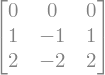

In [25]:
(A - 1*sy.eye(3)) #计算A-lambda*I，其中lambda=1

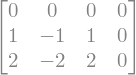

In [26]:
(A - 1*sy.eye(3)).row_join(sy.zeros(3,1)) #构造增广矩阵

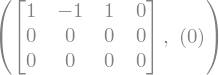

In [27]:
(A - 1*sy.eye(3)).row_join(sy.zeros(3,1)).rref() #求最简行阶梯矩阵

零空间是线性系统的解集。

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
x_2-x_3 \\ x_2 \\ x_3
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
1 \\ 1 \\ 0
\end{matrix}
\right]
+x_3\left[
\begin{matrix}
-1 \\ 0 \\ 1
\end{matrix}
\right]
$$

这被称为是$\lambda = 1$时的<font face="gotham" color="red">特征空间 </font>, 它是 $\mathbb{R}^3$的子空间. 所有的特征向量都在特征空间里。

同理， 对$\lambda = 2$进行操作

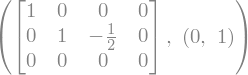

In [28]:
(A - 2*sy.eye(3)).row_join(sy.zeros(3,1)).rref()

零空间是线性系统的解集。

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
0\\ \frac{1}{2}x_3\\ x_3
\end{matrix}
\right]=
x_3\left[
\begin{matrix}
0 \\ \frac{1}{2} \\ 1
\end{matrix}
\right]
$$

利用SymPy中的函数 ```eigenvects``` 计算特征值和特征空间。

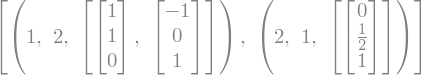

In [29]:
eig = sy.matrices.MatrixEigen.eigenvects(A)
eig

In [30]:
print('特征值 = {0},重数 = {1}, 特征空间 = {2}'.format(eig[0][0], eig[0][1], eig[0][2]))

特征值 = 1,重数 = 2, 特征空间 = [Matrix([
[1],
[1],
[0]]), Matrix([
[-1],
[ 0],
[ 1]])]


In [31]:
print('特征值 = {0}, 重数= {1},特征空间= {2}'.format(eig[1][0], eig[1][1], eig[1][2]))

特征值 = 2, 重数= 1,特征空间= [Matrix([
[  0],
[1/2],
[  1]])]


## <font face="gotham" color="purple"> 利用NumPy函数求特征值和特征空间

把SymPy矩阵转化成NumPy浮点型数组

In [32]:
A = np.array(A).astype(float); A

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 2., -2.,  3.]])

用函数```.eigvals()```和 ```.eig(A)``` 计算特征值和特征向量

In [33]:
np.linalg.eigvals(A)  #计算特征值

array([2., 1., 1.])

In [34]:
np.linalg.eig(A) #同时计算特征值和对应特征向量

(array([2., 1., 1.]),
 array([[ 0.   ,  0.   ,  0.408],
        [ 0.447,  0.707, -0.408],
        [ 0.894,  0.707, -0.816]]))

## <font face="gotham" color="purple">示例

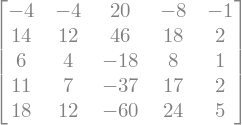

In [83]:
A = sy.Matrix([[-4, -4, 20, -8, -1], 
               [14, 12, 46, 18, 2], 
               [6, 4, -18, 8, 1], 
               [11, 7, -37, 17, 2], 
               [18, 12, -60, 24, 5]])
A

计算特征值

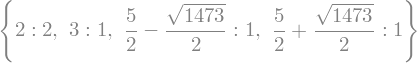

In [73]:
eig = sy.matrices.MatrixEigen.eigenvals(A)
eig

使用Numpy函数计算特征值

In [93]:
A = np.array(A).astype("float")
eigval, eigvec = np.linalg.eig(A)
eigval

array([ 21.69+0.j, -16.69+0.j,   3.  +0.j,   2.  +0.j,   2.  -0.j])

对应的特征向量

In [71]:
eigvec

array([[-0.124, -0.224, -0.   ,  0.816, -0.056],
       [ 0.886, -0.543, -0.894, -0.408,  0.263],
       [ 0.124,  0.224,  0.   , -0.   , -0.   ],
       [ 0.216,  0.392,  0.447, -0.408, -0.207],
       [ 0.371,  0.672, -0.   ,  0.   ,  0.941]])

## <font face="gotham" color="purple"> 可视化的示例

令
$$
A= 
\left[
\begin{matrix}
1 & 6\\ 
5 & 2
\end{matrix}
\right]
$$

计算特征值及特征向量，并在 $\mathbb{R}^2$空间中展示

使用特征方程 $|A - \lambda I|=0$

$$
\left|
\left[
\begin{matrix}
1 & 6\\ 
5 & 2
\end{matrix}
\right]
-
\left[
\begin{matrix}
\lambda & 0\\ 
0 & \lambda
\end{matrix}
\right]\right|=0
$$

In [94]:
lamda = sy.symbols('lamda') #定义sympy中的符号
A = sy.Matrix([[1,6],[5,2]])
I = sy.eye(2) #2阶单位矩阵

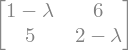

In [95]:
A - lamda*I

In [96]:
p = A.charpoly(lamda);p #计算特征方程

In [99]:
sy.factor(p.as_expr()) #因式分解

得到两个特征值: $7$ 和 $4$. 下一步计算特征向量。

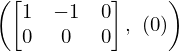

In [76]:
(A - 7*sy.eye(2)).row_join(sy.zeros(2,1)).rref() #得到最简行阶梯矩阵

 $\lambda = 7$对应的特征空间是：

$$
\left[
\begin{matrix}
x_1\\
x_2
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
1\\
1
\end{matrix}
\right]
$$

只要 $x \neq 0$ 任意的向量满足上式都是特征向量. 计算 $\lambda = 4$的特征空间

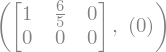

In [100]:
(A + 4*sy.eye(2)).row_join(sy.zeros(2,1)).rref() #得到最简行阶梯矩阵

$\lambda = -4$ 的特征空间是

$$
\left[
\begin{matrix}
x_1\\
x_2
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
-\frac{6}{5}\\
1
\end{matrix}
\right]
$$

作图绘制两个特征向量 $(1, 1)$ 和 $(-6/5, 1)$

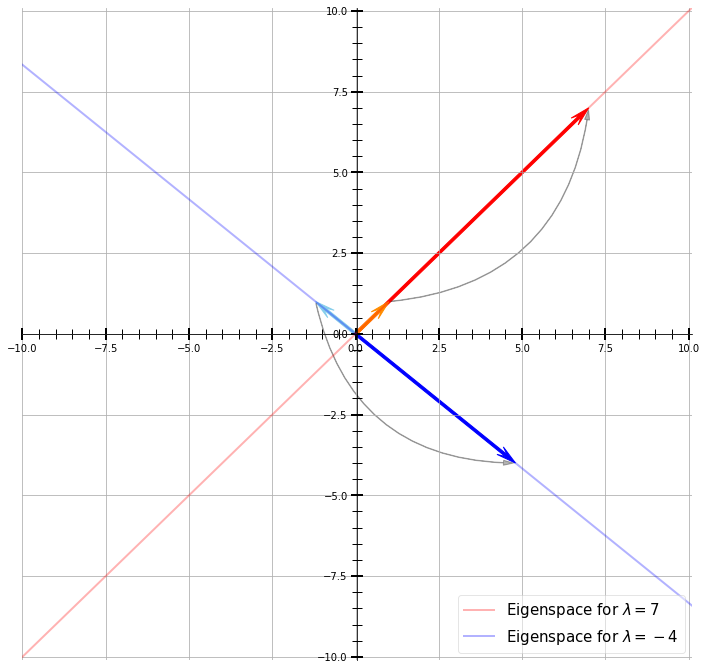

In [78]:
fig, ax = plt.subplots(figsize = (12, 12))

 #绘制图中的四个箭头，前俩个为橙色，后两个为蓝色
arrows = np.array([ [[0,0,1,1]],
                  [[0,0,-6/5,1]],
                  [[0,0,7,7]],
                  [[0,0,24/5,-4]] ])
colors = ['darkorange','skyblue','r','b']
for i in range(arrows.shape[0]):
    X,Y,U,V = zip(*arrows[i,:,:])
    ax.arrow(X[0], Y[0], U[0],V[0], color = colors[i], width = .08, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4, zorder = -i)

################################### Eigenspace #################################
#作出y = x这条直线，颜色为粉色
x = np.arange(-10, 10.6, .5)
y = x
ax.plot(x, y, lw = 2, color = 'red', alpha = .3, label = 'Eigenspace for $\lambda = 7$')


#作出y = -5/6*x这条直线，颜色为浅蓝色
x = np.arange(-10, 10.6, .5)
y = -5/6*x
ax.plot(x, y, lw = 2, color = 'blue', alpha = .3,  label = 'Eigenspace for $\lambda = -4$')

######################## Annotation Arrows ################################

style="Simple, tail_width=0.5, head_width=5, head_length=10"
kw = dict(arrowstyle=style, color="k")

#图中的弧形箭头，从(1,1)指向(7,7)
a = mpl.patches.FancyArrowPatch((1,1), (7,7),connectionstyle="arc3,rad=.4", **kw, alpha = .3)
plt.gca().add_patch(a)

#图中的弧形箭头，从(-6/5,1)指向(24/5,-4)
a = mpl.patches.FancyArrowPatch((-6/5,1), (24/5,-4),connectionstyle="arc3,rad=.4", **kw, alpha = .3)
plt.gca().add_patch(a)

############################ Legend ###############################
#图例
leg = ax.legend(fontsize = 15, loc = 'lower right')
leg.get_frame().set_alpha(0.5)

###################### Axis, Spines, Ticks ##########################
#坐标轴设置
ax.axis([-10, 10.1, -10.1, 10.1])
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis = 'both', direction = 'inout', length=12, width=2, which='major')
ax.tick_params(axis = 'both', direction = 'inout', length=10, width=1, which='minor')
ax.grid()
plt.show()

# <font face="gotham" color="purple"> 几何直观意义

特征向量具有线性变换后保持指向的特殊性质。为了说明这个想法，让我们画一个“圆”和接触圆的边缘的箭头。

先画一条箭头。如果你想画一个更光滑的圆，你可以使用参数函数而不是两个二次函数，因为圆不能用一对一的映射来画。

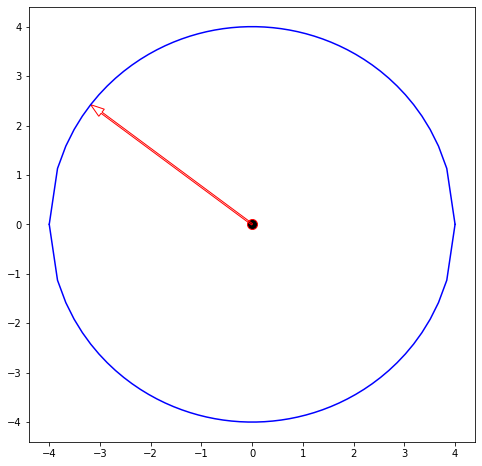

In [5]:
x = np.linspace(-4, 4)
y_u = np.sqrt(16 - x**2)
y_d = -np.sqrt(16 - x**2)

fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y_u, color = 'b')  #先画上半圆
ax.plot(x, y_d, color = 'b')  #再画下半圆

ax.scatter(0, 0, s = 100, fc = 'k', ec = 'r') #作出原点

ax.arrow(0, 0, x[5], y_u[5], head_width = .18, 
         head_length= .27, length_includes_head = True, #从原点(0,0)指向(x[5],y_u[5])的箭头
         width = .03, ec = 'r', fc = 'None')
plt.show()

现在，作一个同样的圆，但是包含更多的箭头。

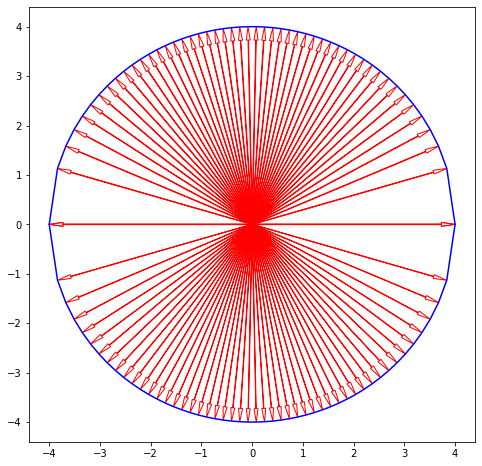

In [4]:
x = np.linspace(-4, 4, 50)
y_u = np.sqrt(16 - x**2)
y_d = -np.sqrt(16 - x**2)

fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y_u, color = 'b') #作出上半圆，蓝色线
ax.plot(x, y_d, color = 'b')  #作出下半圆，蓝色线

ax.scatter(0, 0, s = 100, fc = 'k', ec = 'r') #原点

for i in range(len(x)):
    ax.arrow(0, 0, x[i], y_u[i], head_width = .08, 
             head_length= .27, length_includes_head = True, #指向上半圆的箭头
             width = .01, ec = 'r', fc = 'None')
    ax.arrow(0, 0, x[i], y_d[i], head_width = .08, 
             head_length= .27, length_includes_head = True,  #指向下半圆的箭头
             width = .008, ec = 'r', fc = 'None')

现在我们将对圆进行线性变换。从技术上讲，我们只能对圆上指定的点(箭头尖端)进行变换。

创建矩阵

$$
A = 
\left[\begin{matrix}
3 & -2\\
1 & 0
\end{matrix}\right]
$$

将所有的坐标分别对齐到上下半部分的两个矩阵中。

$$
V_u = 
\left[\begin{matrix}
x_1^u & x_2^u & \ldots & x_m^u\\
y_1^u & y_2^u & \ldots & y_m^u
\end{matrix}\right]\\
V_d = 
\left[\begin{matrix}
x_1^d & x_2^d & \ldots & x_m^d\\
y_1^d & y_2^d & \ldots & y_m^d
\end{matrix}\right]
$$

矩阵相乘 $AV_u$ and $AV_d$是对圆的线性变换

In [12]:
A = np.array([[3, -2], [1, 0]])

#这里x[:, np.newaxis]的作用是增加一个维度，将x变成50*1的矩阵
#同理将y也变成50*1的矩阵，然后按行合并成50*2的矩阵
Vu = np.hstack((x[:, np.newaxis], y_u[:, np.newaxis])) 
AV_u = (A@Vu.T) #矩阵乘法

Vd = np.hstack((x[:, np.newaxis], y_d[:, np.newaxis]))
AV_d = (A@Vd.T)

In [9]:
Vu.shape #合并后为50*2维的矩阵

这个圆变成了椭圆。但是，如果仔细观察，会发现线性变换后仍然有一些箭头指向相同的方向。

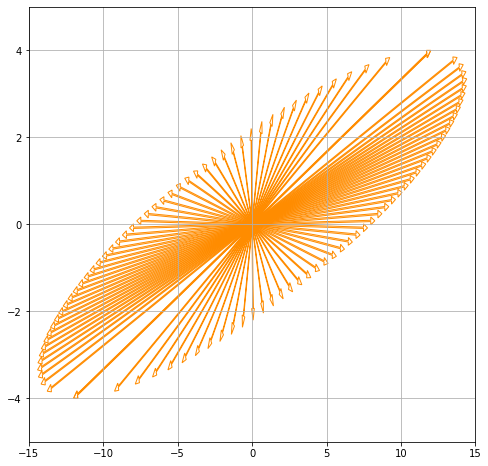

In [13]:
fig, ax = plt.subplots(figsize = (8, 8))

for i in range(len(x)):
    ax.arrow(0, 0, AV_u[0, i], AV_u[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')
    ax.arrow(0, 0, AV_d[0, i], AV_d[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')    
ax.axis([-15, 15, -5, 5])
ax.grid()
plt.show()

我们可以把圆和椭圆画在一起，那些在线性变换前后指向相同方向的向量是$A$的特征向量，特征值是它们之间的长度比。

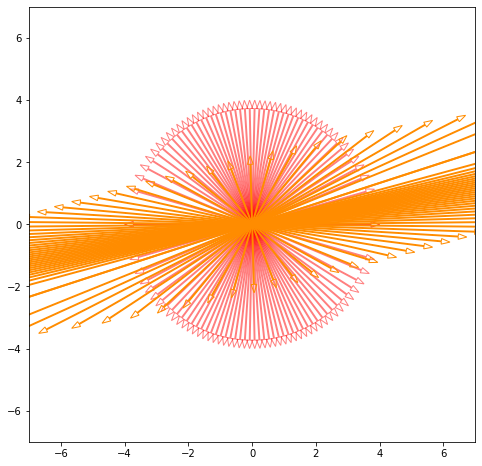

In [14]:
k = 50
x = np.linspace(-4, 4, k)
y_u = np.sqrt(16 - x**2)
y_d = -np.sqrt(16 - x**2)

fig, ax = plt.subplots(figsize = (8, 8))

ax.scatter(0, 0, s = 100, fc = 'k', ec = 'r') #原点

#这里是圆的箭头
for i in range(len(x)):
    ax.arrow(0, 0, x[i], y_u[i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'r', alpha = .5, fc = 'None')
    ax.arrow(0, 0, x[i], y_d[i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'r', alpha = .5, fc = 'None')

A = np.array([[3, -2], [1, 0]])

v = np.hstack((x[:, np.newaxis], y_u[:, np.newaxis]))
Av_1 = (A@v.T)

v = np.hstack((x[:, np.newaxis], y_d[:, np.newaxis]))
Av_2 = (A@v.T)

#这里是椭圆的箭头
for i in range(len(x)):
    ax.arrow(0, 0, Av_1[0, i], Av_1[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')
    ax.arrow(0, 0, Av_2[0, i], Av_2[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')    
n = 7
ax.axis([-n, n, -n, n])
plt.show()